In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from DataGenerator2D import DataGenerator2D
from Models import Unet
from tensorflow import keras
from Evaluation_matrices import iou, f1, dice_coef, dice_coef_loss

# COMPILING MODEL

In [2]:

unet = Unet()
model = unet.build_model()
checkpoint = ModelCheckpoint('//PATH TO SAVE YOUR MODEL//', verbose=1, monitor ='val_loss',  save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

callbacks = [ checkpoint, reduce_lr]

opt = tf.keras.optimizers.experimental.Adam(1e-3)
metrics = [f1, iou , dice_coef ]

model.compile(loss=dice_coef_loss,
              optimizer=opt,
              metrics=metrics)

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 16  2320        ['conv2d_18[0][0]']              
                                )                                                           

 bin_seg (Conv2D)               (None, 256, 256, 1)  17          ['conv2d_35[0][0]']              
                                                                                                  
Total params: 1,941,105
Trainable params: 1,941,105
Non-trainable params: 0
__________________________________________________________________________________________________


In [3]:

train_generator = DataGenerator2D('//PATH TO YOUR TRAINING DATA//', img_size=256, batch_size=10, shuffle=True)
val_generator = DataGenerator2D('//PATH TO YOUR TEST DATA//', img_size=256, batch_size=10, shuffle=False)

# Part 3 - Training

history = model.fit(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=20,
                              validation_steps=10,
                              epochs=100,
                              callbacks=callbacks)

print(history.history.keys())

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.8922 - f1: 0.1067 - iou: 0.0571 - dice_coef: 0.1078
Epoch 1: val_loss improved from inf to 0.93473, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 20s 555ms/step - loss: 0.8922 - f1: 0.1067 - iou: 0.0571 - dice_coef: 0.1078 - val_loss: 0.9347 - val_f1: 0.0107 - val_iou: 0.0339 - val_dice_coef: 0.0653 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.8290 - f1: 0.1848 - iou: 0.0954 - dice_coef: 0.1710
Epoch 2: val_loss improved from 0.93473 to 0.68825, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 484ms/step - loss: 0.8290 - f1: 0.1848 - iou: 0.0954 - dice_coef: 0.1710 - val_loss: 0.6882 - val_f1: 0.3138 - val_iou: 0.1858 - val_dice_coef: 0.3118 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.6732 - f1: 0.3302 - iou: 0.2010 - dice_coef: 0.3268
Epoch 3: val_loss improved from 0.68825 to 0.49562, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 507ms/step - loss: 0.6732 - f1: 0.3302 - iou: 0.2010 - dice_coef: 0.3268 - val_loss: 0.4956 - val_f1: 0.5052 - val_iou: 0.3412 - val_dice_coef: 0.5044 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.4922 - f1: 0.5104 - iou: 0.3503 - dice_coef: 0.5078
Epoch 4: val_loss improved from 0.49562 to 0.42037, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 486ms/step - loss: 0.4922 - f1: 0.5104 - iou: 0.3503 - dice_coef: 0.5078 - val_loss: 0.4204 - val_f1: 0.5830 - val_iou: 0.4196 - val_dice_coef: 0.5796 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - ETA: 0s - loss: 0.3903 - f1: 0.6144 - iou: 0.4532 - dice_coef: 0.6097
Epoch 5: val_loss improved from 0.42037 to 0.37923, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 498ms/step - loss: 0.3903 - f1: 0.6144 - iou: 0.4532 - dice_coef: 0.6097 - val_loss: 0.3792 - val_f1: 0.6232 - val_iou: 0.4703 - val_dice_coef: 0.6208 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - ETA: 0s - loss: 0.3449 - f1: 0.6571 - iou: 0.5018 - dice_coef: 0.6551
Epoch 6: val_loss improved from 0.37923 to 0.31692, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 486ms/step - loss: 0.3449 - f1: 0.6571 - iou: 0.5018 - dice_coef: 0.6551 - val_loss: 0.3169 - val_f1: 0.6832 - val_iou: 0.5287 - val_dice_coef: 0.6831 - lr: 0.0010
Epoch 7/100
20/20 [==============================] - ETA: 0s - loss: 0.3232 - f1: 0.6794 - iou: 0.5284 - dice_coef: 0.6768
Epoch 7: val_loss improved from 0.31692 to 0.29528, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 497ms/step - loss: 0.3232 - f1: 0.6794 - iou: 0.5284 - dice_coef: 0.6768 - val_loss: 0.2953 - val_f1: 0.7058 - val_iou: 0.5566 - val_dice_coef: 0.7047 - lr: 0.0010
Epoch 8/100
20/20 [==============================] - ETA: 0s - loss: 0.2808 - f1: 0.7252 - iou: 0.5798 - dice_coef: 0.7192
Epoch 8: val_loss improved from 0.29528 to 0.27238, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 513ms/step - loss: 0.2808 - f1: 0.7252 - iou: 0.5798 - dice_coef: 0.7192 - val_loss: 0.2724 - val_f1: 0.7276 - val_iou: 0.5829 - val_dice_coef: 0.7276 - lr: 0.0010
Epoch 9/100
20/20 [==============================] - ETA: 0s - loss: 0.2648 - f1: 0.7406 - iou: 0.6071 - dice_coef: 0.7350
Epoch 9: val_loss improved from 0.27238 to 0.26130, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 12s 583ms/step - loss: 0.2648 - f1: 0.7406 - iou: 0.6071 - dice_coef: 0.7350 - val_loss: 0.2613 - val_f1: 0.7378 - val_iou: 0.5965 - val_dice_coef: 0.7387 - lr: 0.0010
Epoch 10/100
20/20 [==============================] - ETA: 0s - loss: 0.2415 - f1: 0.7637 - iou: 0.6339 - dice_coef: 0.7585
Epoch 10: val_loss improved from 0.26130 to 0.23938, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 11s 542ms/step - loss: 0.2415 - f1: 0.7637 - iou: 0.6339 - dice_coef: 0.7585 - val_loss: 0.2394 - val_f1: 0.7604 - val_iou: 0.6286 - val_dice_coef: 0.7606 - lr: 0.0010
Epoch 11/100
20/20 [==============================] - ETA: 0s - loss: 0.1898 - f1: 0.8145 - iou: 0.7148 - dice_coef: 0.8102
Epoch 11: val_loss did not improve from 0.23938
20/20 [==============================] - 7s 335ms/step - loss: 0.1898 - f1: 0.8145 - iou: 0.7148 - dice_coef: 0.8102 - val_loss: 0.2915 - val_f1: 0.7096 - val_iou: 0.5631 - val_dice_coef: 0.7085 - lr: 0.0010
Epoch 12/100
20/20 [==============================] - ETA: 0s - loss: 0.1923 - f1: 0.8134 - iou: 0.7062 - dice_coef: 0.8077
Epoch 12: val_loss did not improve from 0.23938
20/20 [==============================] - 7s 346ms/step - loss: 0.1923 - f1: 0.8134 - iou: 0.7062 - dice_coef: 0.8077 - val_loss: 0.2883 - val_f1: 0.7142 - val_iou: 0.5745 - val_dice_coef: 0.7117 - lr: 0.0010
Epoch 13/100
20/20 [===========

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 500ms/step - loss: 0.1451 - f1: 0.8619 - iou: 0.7785 - dice_coef: 0.8549 - val_loss: 0.1957 - val_f1: 0.8038 - val_iou: 0.6890 - val_dice_coef: 0.8043 - lr: 5.0000e-04
Epoch 15/100
20/20 [==============================] - ETA: 0s - loss: 0.1446 - f1: 0.8610 - iou: 0.7762 - dice_coef: 0.8554
Epoch 15: val_loss did not improve from 0.19568
20/20 [==============================] - 7s 335ms/step - loss: 0.1446 - f1: 0.8610 - iou: 0.7762 - dice_coef: 0.8554 - val_loss: 0.2037 - val_f1: 0.7960 - val_iou: 0.6761 - val_dice_coef: 0.7963 - lr: 5.0000e-04
Epoch 16/100
20/20 [==============================] - ETA: 0s - loss: 0.1078 - f1: 0.8934 - iou: 0.8392 - dice_coef: 0.8922
Epoch 16: val_loss improved from 0.19568 to 0.18677, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 507ms/step - loss: 0.1078 - f1: 0.8934 - iou: 0.8392 - dice_coef: 0.8922 - val_loss: 0.1868 - val_f1: 0.8122 - val_iou: 0.6998 - val_dice_coef: 0.8132 - lr: 5.0000e-04
Epoch 17/100
20/20 [==============================] - ETA: 0s - loss: 0.1172 - f1: 0.8844 - iou: 0.8174 - dice_coef: 0.8825
Epoch 17: val_loss did not improve from 0.18677
20/20 [==============================] - 7s 335ms/step - loss: 0.1172 - f1: 0.8844 - iou: 0.8174 - dice_coef: 0.8825 - val_loss: 0.1975 - val_f1: 0.8016 - val_iou: 0.6847 - val_dice_coef: 0.8025 - lr: 5.0000e-04
Epoch 18/100
20/20 [==============================] - ETA: 0s - loss: 0.1213 - f1: 0.8825 - iou: 0.8252 - dice_coef: 0.8787
Epoch 18: val_loss improved from 0.18677 to 0.17678, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 512ms/step - loss: 0.1213 - f1: 0.8825 - iou: 0.8252 - dice_coef: 0.8787 - val_loss: 0.1768 - val_f1: 0.8228 - val_iou: 0.7135 - val_dice_coef: 0.8232 - lr: 5.0000e-04
Epoch 19/100
20/20 [==============================] - ETA: 0s - loss: 0.1273 - f1: 0.8756 - iou: 0.8066 - dice_coef: 0.8727
Epoch 19: val_loss improved from 0.17678 to 0.15920, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 495ms/step - loss: 0.1273 - f1: 0.8756 - iou: 0.8066 - dice_coef: 0.8727 - val_loss: 0.1592 - val_f1: 0.8397 - val_iou: 0.7383 - val_dice_coef: 0.8408 - lr: 5.0000e-04
Epoch 20/100
20/20 [==============================] - ETA: 0s - loss: 0.1375 - f1: 0.8695 - iou: 0.7992 - dice_coef: 0.8625
Epoch 20: val_loss did not improve from 0.15920
20/20 [==============================] - 7s 334ms/step - loss: 0.1375 - f1: 0.8695 - iou: 0.7992 - dice_coef: 0.8625 - val_loss: 0.1660 - val_f1: 0.8326 - val_iou: 0.7308 - val_dice_coef: 0.8340 - lr: 5.0000e-04
Epoch 21/100
20/20 [==============================] - ETA: 0s - loss: 0.1082 - f1: 0.8933 - iou: 0.8380 - dice_coef: 0.8918
Epoch 21: val_loss did not improve from 0.15920
20/20 [==============================] - 7s 338ms/step - loss: 0.1082 - f1: 0.8933 - iou: 0.8380 - dice_coef: 0.8918 - val_loss: 0.1937 - val_f1: 0.8062 - val_iou: 0.6896 - val_dice_coef: 0.8063 - lr: 5.0000e-04
Epoch 22/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 489ms/step - loss: 0.0815 - f1: 0.9231 - iou: 0.8797 - dice_coef: 0.9185 - val_loss: 0.1582 - val_f1: 0.8400 - val_iou: 0.7407 - val_dice_coef: 0.8418 - lr: 2.5000e-04
Epoch 24/100
20/20 [==============================] - ETA: 0s - loss: 0.0766 - f1: 0.9199 - iou: 0.8919 - dice_coef: 0.9234
Epoch 24: val_loss improved from 0.15817 to 0.14917, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 489ms/step - loss: 0.0766 - f1: 0.9199 - iou: 0.8919 - dice_coef: 0.9234 - val_loss: 0.1492 - val_f1: 0.8496 - val_iou: 0.7551 - val_dice_coef: 0.8508 - lr: 2.5000e-04
Epoch 25/100
20/20 [==============================] - ETA: 0s - loss: 0.0709 - f1: 0.9300 - iou: 0.8968 - dice_coef: 0.9291
Epoch 25: val_loss improved from 0.14917 to 0.14683, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 492ms/step - loss: 0.0709 - f1: 0.9300 - iou: 0.8968 - dice_coef: 0.9291 - val_loss: 0.1468 - val_f1: 0.8516 - val_iou: 0.7581 - val_dice_coef: 0.8532 - lr: 2.5000e-04
Epoch 26/100
20/20 [==============================] - ETA: 0s - loss: 0.0624 - f1: 0.9380 - iou: 0.9163 - dice_coef: 0.9376
Epoch 26: val_loss improved from 0.14683 to 0.14094, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 492ms/step - loss: 0.0624 - f1: 0.9380 - iou: 0.9163 - dice_coef: 0.9376 - val_loss: 0.1409 - val_f1: 0.8580 - val_iou: 0.7656 - val_dice_coef: 0.8591 - lr: 2.5000e-04
Epoch 27/100
20/20 [==============================] - ETA: 0s - loss: 0.0658 - f1: 0.9378 - iou: 0.9110 - dice_coef: 0.9342
Epoch 27: val_loss improved from 0.14094 to 0.13463, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 497ms/step - loss: 0.0658 - f1: 0.9378 - iou: 0.9110 - dice_coef: 0.9342 - val_loss: 0.1346 - val_f1: 0.8643 - val_iou: 0.7753 - val_dice_coef: 0.8654 - lr: 2.5000e-04
Epoch 28/100
20/20 [==============================] - ETA: 0s - loss: 0.0678 - f1: 0.9337 - iou: 0.9037 - dice_coef: 0.9322
Epoch 28: val_loss did not improve from 0.13463
20/20 [==============================] - 7s 336ms/step - loss: 0.0678 - f1: 0.9337 - iou: 0.9037 - dice_coef: 0.9322 - val_loss: 0.1396 - val_f1: 0.8587 - val_iou: 0.7682 - val_dice_coef: 0.8604 - lr: 2.5000e-04
Epoch 29/100
20/20 [==============================] - ETA: 0s - loss: 0.0638 - f1: 0.9369 - iou: 0.9136 - dice_coef: 0.9362
Epoch 29: val_loss did not improve from 0.13463
20/20 [==============================] - 7s 347ms/step - loss: 0.0638 - f1: 0.9369 - iou: 0.9136 - dice_coef: 0.9362 - val_loss: 0.1376 - val_f1: 0.8612 - val_iou: 0.7705 - val_dice_coef: 0.8624 - lr: 2.5000e-04
Epoch 30/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 489ms/step - loss: 0.0950 - f1: 0.9056 - iou: 0.8592 - dice_coef: 0.9050 - val_loss: 0.1333 - val_f1: 0.8652 - val_iou: 0.7768 - val_dice_coef: 0.8667 - lr: 2.5000e-04
Epoch 31/100
20/20 [==============================] - ETA: 0s - loss: 0.0665 - f1: 0.9348 - iou: 0.9032 - dice_coef: 0.9335
Epoch 31: val_loss did not improve from 0.13334
20/20 [==============================] - 7s 337ms/step - loss: 0.0665 - f1: 0.9348 - iou: 0.9032 - dice_coef: 0.9335 - val_loss: 0.1474 - val_f1: 0.8516 - val_iou: 0.7575 - val_dice_coef: 0.8526 - lr: 2.5000e-04
Epoch 32/100
20/20 [==============================] - ETA: 0s - loss: 0.0521 - f1: 0.9479 - iou: 0.9329 - dice_coef: 0.9479
Epoch 32: val_loss improved from 0.13334 to 0.12324, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 495ms/step - loss: 0.0521 - f1: 0.9479 - iou: 0.9329 - dice_coef: 0.9479 - val_loss: 0.1232 - val_f1: 0.8751 - val_iou: 0.7937 - val_dice_coef: 0.8768 - lr: 2.5000e-04
Epoch 33/100
20/20 [==============================] - ETA: 0s - loss: 0.0695 - f1: 0.9320 - iou: 0.9061 - dice_coef: 0.9305
Epoch 33: val_loss did not improve from 0.12324
20/20 [==============================] - 7s 338ms/step - loss: 0.0695 - f1: 0.9320 - iou: 0.9061 - dice_coef: 0.9305 - val_loss: 0.1268 - val_f1: 0.8714 - val_iou: 0.7876 - val_dice_coef: 0.8732 - lr: 2.5000e-04
Epoch 34/100
20/20 [==============================] - ETA: 0s - loss: 0.0788 - f1: 0.9205 - iou: 0.8913 - dice_coef: 0.9212
Epoch 34: val_loss did not improve from 0.12324
20/20 [==============================] - 7s 345ms/step - loss: 0.0788 - f1: 0.9205 - iou: 0.8913 - dice_coef: 0.9212 - val_loss: 0.1369 - val_f1: 0.8610 - val_iou: 0.7721 - val_dice_coef: 0.8631 - lr: 2.5000e-04
Epoch 35/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 491ms/step - loss: 0.0667 - f1: 0.9337 - iou: 0.9143 - dice_coef: 0.9333 - val_loss: 0.1174 - val_f1: 0.8815 - val_iou: 0.8019 - val_dice_coef: 0.8826 - lr: 1.2500e-04
Epoch 37/100
20/20 [==============================] - ETA: 0s - loss: 0.0607 - f1: 0.9411 - iou: 0.9267 - dice_coef: 0.9393
Epoch 37: val_loss improved from 0.11740 to 0.11707, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 482ms/step - loss: 0.0607 - f1: 0.9411 - iou: 0.9267 - dice_coef: 0.9393 - val_loss: 0.1171 - val_f1: 0.8814 - val_iou: 0.8030 - val_dice_coef: 0.8829 - lr: 1.2500e-04
Epoch 38/100
20/20 [==============================] - ETA: 0s - loss: 0.0461 - f1: 0.9551 - iou: 0.9456 - dice_coef: 0.9539
Epoch 38: val_loss did not improve from 0.11707
20/20 [==============================] - 7s 333ms/step - loss: 0.0461 - f1: 0.9551 - iou: 0.9456 - dice_coef: 0.9539 - val_loss: 0.1346 - val_f1: 0.8639 - val_iou: 0.7759 - val_dice_coef: 0.8654 - lr: 1.2500e-04
Epoch 39/100
20/20 [==============================] - ETA: 0s - loss: 0.0365 - f1: 0.9638 - iou: 0.9591 - dice_coef: 0.9635
Epoch 39: val_loss did not improve from 0.11707
20/20 [==============================] - 7s 348ms/step - loss: 0.0365 - f1: 0.9638 - iou: 0.9591 - dice_coef: 0.9635 - val_loss: 0.1250 - val_f1: 0.8737 - val_iou: 0.7910 - val_dice_coef: 0.8750 - lr: 1.2500e-04
Epoch 40/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 497ms/step - loss: 0.0348 - f1: 0.9659 - iou: 0.9643 - dice_coef: 0.9652 - val_loss: 0.1158 - val_f1: 0.8829 - val_iou: 0.8044 - val_dice_coef: 0.8842 - lr: 1.2500e-04
Epoch 41/100
20/20 [==============================] - ETA: 0s - loss: 0.0479 - f1: 0.9542 - iou: 0.9374 - dice_coef: 0.9521
Epoch 41: val_loss did not improve from 0.11582
20/20 [==============================] - 7s 327ms/step - loss: 0.0479 - f1: 0.9542 - iou: 0.9374 - dice_coef: 0.9521 - val_loss: 0.1245 - val_f1: 0.8740 - val_iou: 0.7910 - val_dice_coef: 0.8755 - lr: 1.2500e-04
Epoch 42/100
20/20 [==============================] - ETA: 0s - loss: 0.0278 - f1: 0.9730 - iou: 0.9795 - dice_coef: 0.9722
Epoch 42: val_loss did not improve from 0.11582
20/20 [==============================] - 7s 347ms/step - loss: 0.0278 - f1: 0.9730 - iou: 0.9795 - dice_coef: 0.9722 - val_loss: 0.1185 - val_f1: 0.8799 - val_iou: 0.8005 - val_dice_coef: 0.8815 - lr: 1.2500e-04
Epoch 43/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 500ms/step - loss: 0.0267 - f1: 0.9730 - iou: 0.9813 - dice_coef: 0.9733 - val_loss: 0.1145 - val_f1: 0.8842 - val_iou: 0.8078 - val_dice_coef: 0.8855 - lr: 1.2500e-04
Epoch 44/100
20/20 [==============================] - ETA: 0s - loss: 0.0441 - f1: 0.9570 - iou: 0.9527 - dice_coef: 0.9559
Epoch 44: val_loss did not improve from 0.11449
20/20 [==============================] - 7s 338ms/step - loss: 0.0441 - f1: 0.9570 - iou: 0.9527 - dice_coef: 0.9559 - val_loss: 0.1158 - val_f1: 0.8825 - val_iou: 0.8051 - val_dice_coef: 0.8842 - lr: 1.2500e-04
Epoch 45/100
20/20 [==============================] - ETA: 0s - loss: 0.0530 - f1: 0.9468 - iou: 0.9348 - dice_coef: 0.9470
Epoch 45: val_loss did not improve from 0.11449
20/20 [==============================] - 7s 346ms/step - loss: 0.0530 - f1: 0.9468 - iou: 0.9348 - dice_coef: 0.9470 - val_loss: 0.1166 - val_f1: 0.8822 - val_iou: 0.8030 - val_dice_coef: 0.8834 - lr: 1.2500e-04
Epoch 46/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 488ms/step - loss: 0.0252 - f1: 0.9757 - iou: 0.9796 - dice_coef: 0.9748 - val_loss: 0.1132 - val_f1: 0.8852 - val_iou: 0.8093 - val_dice_coef: 0.8868 - lr: 6.2500e-05
Epoch 48/100
20/20 [==============================] - ETA: 0s - loss: 0.0103 - f1: 0.9908 - iou: 1.0152 - dice_coef: 0.9897
Epoch 48: val_loss did not improve from 0.11316
20/20 [==============================] - 7s 337ms/step - loss: 0.0103 - f1: 0.9908 - iou: 1.0152 - dice_coef: 0.9897 - val_loss: 0.1161 - val_f1: 0.8824 - val_iou: 0.8054 - val_dice_coef: 0.8839 - lr: 6.2500e-05
Epoch 49/100
20/20 [==============================] - ETA: 0s - loss: 0.0505 - f1: 0.9518 - iou: 0.9427 - dice_coef: 0.9495
Epoch 49: val_loss improved from 0.11316 to 0.11138, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 501ms/step - loss: 0.0505 - f1: 0.9518 - iou: 0.9427 - dice_coef: 0.9495 - val_loss: 0.1114 - val_f1: 0.8873 - val_iou: 0.8120 - val_dice_coef: 0.8886 - lr: 6.2500e-05
Epoch 50/100
20/20 [==============================] - ETA: 0s - loss: 0.0385 - f1: 0.9630 - iou: 0.9620 - dice_coef: 0.9615
Epoch 50: val_loss improved from 0.11138 to 0.10960, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 9s 478ms/step - loss: 0.0385 - f1: 0.9630 - iou: 0.9620 - dice_coef: 0.9615 - val_loss: 0.1096 - val_f1: 0.8891 - val_iou: 0.8153 - val_dice_coef: 0.8904 - lr: 6.2500e-05
Epoch 51/100
20/20 [==============================] - ETA: 0s - loss: 0.0350 - f1: 0.9636 - iou: 0.9687 - dice_coef: 0.9650
Epoch 51: val_loss did not improve from 0.10960
20/20 [==============================] - 7s 338ms/step - loss: 0.0350 - f1: 0.9636 - iou: 0.9687 - dice_coef: 0.9650 - val_loss: 0.1116 - val_f1: 0.8870 - val_iou: 0.8122 - val_dice_coef: 0.8884 - lr: 6.2500e-05
Epoch 52/100
20/20 [==============================] - ETA: 0s - loss: 0.0044 - f1: 0.9946 - iou: 1.0220 - dice_coef: 0.9955  
Epoch 52: val_loss did not improve from 0.10960
20/20 [==============================] - 7s 348ms/step - loss: 0.0044 - f1: 0.9946 - iou: 1.0220 - dice_coef: 0.9955 - val_loss: 0.1190 - val_f1: 0.8795 - val_iou: 0.8012 - val_dice_coef: 0.8810 - lr: 6.2500e-05
Epoch 53/100
20/20

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 494ms/step - loss: 0.0333 - f1: 0.9686 - iou: 0.9709 - dice_coef: 0.9667 - val_loss: 0.1077 - val_f1: 0.8910 - val_iou: 0.8181 - val_dice_coef: 0.8923 - lr: 6.2500e-05
Epoch 54/100
20/20 [==============================] - ETA: 0s - loss: 0.0355 - f1: 0.9646 - iou: 0.9633 - dice_coef: 0.9645
Epoch 54: val_loss did not improve from 0.10766
20/20 [==============================] - 7s 335ms/step - loss: 0.0355 - f1: 0.9646 - iou: 0.9633 - dice_coef: 0.9645 - val_loss: 0.1148 - val_f1: 0.8836 - val_iou: 0.8070 - val_dice_coef: 0.8852 - lr: 6.2500e-05
Epoch 55/100
20/20 [==============================] - ETA: 0s - loss: 0.0310 - f1: 0.9676 - iou: 0.9747 - dice_coef: 0.9690
Epoch 55: val_loss did not improve from 0.10766
20/20 [==============================] - 7s 344ms/step - loss: 0.0310 - f1: 0.9676 - iou: 0.9747 - dice_coef: 0.9690 - val_loss: 0.1089 - val_f1: 0.8899 - val_iou: 0.8162 - val_dice_coef: 0.8911 - lr: 6.2500e-05
Epoch 56/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 503ms/step - loss: 0.0047 - f1: 0.9947 - iou: 1.0209 - dice_coef: 0.9953 - val_loss: 0.1075 - val_f1: 0.8911 - val_iou: 0.8188 - val_dice_coef: 0.8925 - lr: 1.5625e-05
Epoch 62/100
20/20 [==============================] - ETA: 0s - loss: 0.0216 - f1: 0.9766 - iou: 0.9911 - dice_coef: 0.9784
Epoch 62: val_loss did not improve from 0.10753
20/20 [==============================] - 7s 335ms/step - loss: 0.0216 - f1: 0.9766 - iou: 0.9911 - dice_coef: 0.9784 - val_loss: 0.1097 - val_f1: 0.8891 - val_iou: 0.8150 - val_dice_coef: 0.8903 - lr: 1.5625e-05
Epoch 63/100
20/20 [==============================] - ETA: 0s - loss: 0.0111 - f1: 0.9909 - iou: 1.0170 - dice_coef: 0.9889
Epoch 63: val_loss did not improve from 0.10753
20/20 [==============================] - 7s 341ms/step - loss: 0.0111 - f1: 0.9909 - iou: 1.0170 - dice_coef: 0.9889 - val_loss: 0.1079 - val_f1: 0.8906 - val_iou: 0.8181 - val_dice_coef: 0.8921 - lr: 1.5625e-05
Epoch 64/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 514ms/step - loss: 0.0225 - f1: 0.9796 - iou: 0.9947 - dice_coef: 0.9775 - val_loss: 0.1075 - val_f1: 0.8912 - val_iou: 0.8183 - val_dice_coef: 0.8925 - lr: 3.9063e-06
Epoch 69/100
20/20 [==============================] - ETA: 0s - loss: 0.0103 - f1: 0.9896 - iou: 1.0204 - dice_coef: 0.9897
Epoch 69: val_loss did not improve from 0.10751
20/20 [==============================] - 7s 341ms/step - loss: 0.0103 - f1: 0.9896 - iou: 1.0204 - dice_coef: 0.9897 - val_loss: 0.1081 - val_f1: 0.8903 - val_iou: 0.8173 - val_dice_coef: 0.8919 - lr: 3.9063e-06
Epoch 70/100
20/20 [==============================] - ETA: 0s - loss: 0.0133 - f1: 0.9861 - iou: 1.0064 - dice_coef: 0.9867
Epoch 70: val_loss did not improve from 0.10751

Epoch 70: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
20/20 [==============================] - 7s 355ms/step - loss: 0.0133 - f1: 0.9861 - iou: 1.0064 - dice_coef: 0.9867 - val_loss: 0.1081 - val_f1: 0.8905

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 502ms/step - loss: 0.0104 - f1: 0.9891 - iou: 1.0127 - dice_coef: 0.9896 - val_loss: 0.1075 - val_f1: 0.8912 - val_iou: 0.8184 - val_dice_coef: 0.8925 - lr: 1.0000e-06
Epoch 81/100
20/20 [==============================] - ETA: 0s - loss: 0.0042 - f1: 0.9958 - iou: 1.0322 - dice_coef: 0.9958
Epoch 81: val_loss improved from 0.10746 to 0.10740, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 504ms/step - loss: 0.0042 - f1: 0.9958 - iou: 1.0322 - dice_coef: 0.9958 - val_loss: 0.1074 - val_f1: 0.8913 - val_iou: 0.8186 - val_dice_coef: 0.8926 - lr: 1.0000e-06
Epoch 82/100
20/20 [==============================] - ETA: 0s - loss: 0.0061 - f1: 0.9935 - iou: 1.0192 - dice_coef: 0.9939
Epoch 82: val_loss improved from 0.10740 to 0.10736, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 10s 485ms/step - loss: 0.0061 - f1: 0.9935 - iou: 1.0192 - dice_coef: 0.9939 - val_loss: 0.1074 - val_f1: 0.8913 - val_iou: 0.8186 - val_dice_coef: 0.8926 - lr: 1.0000e-06
Epoch 83/100
20/20 [==============================] - ETA: 0s - loss: 0.0067 - f1: 0.9932 - iou: 1.0203 - dice_coef: 0.9934
Epoch 83: val_loss improved from 0.10736 to 0.10735, saving model to E:\NU\Grad\TuSimple\Unet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Unet_lanesegmentation_model\assets


20/20 [==============================] - 11s 527ms/step - loss: 0.0067 - f1: 0.9932 - iou: 1.0203 - dice_coef: 0.9934 - val_loss: 0.1073 - val_f1: 0.8912 - val_iou: 0.8187 - val_dice_coef: 0.8927 - lr: 1.0000e-06
Epoch 84/100
20/20 [==============================] - ETA: 0s - loss: 0.0137 - f1: 0.9859 - iou: 1.0010 - dice_coef: 0.9865
Epoch 84: val_loss did not improve from 0.10735
20/20 [==============================] - 7s 358ms/step - loss: 0.0137 - f1: 0.9859 - iou: 1.0010 - dice_coef: 0.9865 - val_loss: 0.1077 - val_f1: 0.8910 - val_iou: 0.8181 - val_dice_coef: 0.8923 - lr: 1.0000e-06
Epoch 85/100
20/20 [==============================] - ETA: 0s - loss: 0.0091 - f1: 0.9904 - iou: 1.0139 - dice_coef: 0.9909
Epoch 85: val_loss did not improve from 0.10735
20/20 [==============================] - 8s 381ms/step - loss: 0.0091 - f1: 0.9904 - iou: 1.0139 - dice_coef: 0.9909 - val_loss: 0.1079 - val_f1: 0.8907 - val_iou: 0.8178 - val_dice_coef: 0.8921 - lr: 1.0000e-06
Epoch 86/100
20/20 

In [4]:
model.save_weights('//PATH TO SAVE YOUR WEIGHTS//')

# Part 4 - Visualization

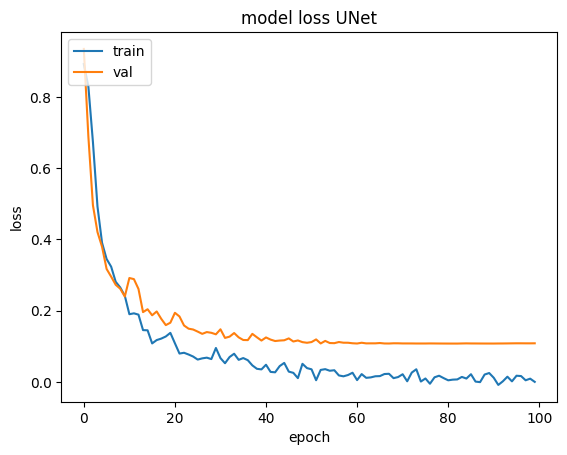

In [5]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss UNet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


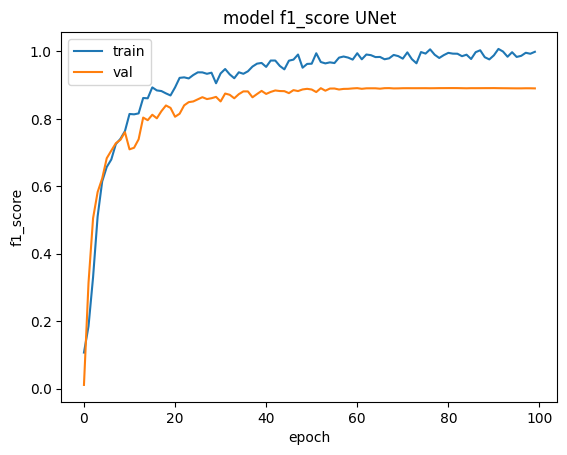

In [6]:
# summarize history for F1

plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1_score UNet')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


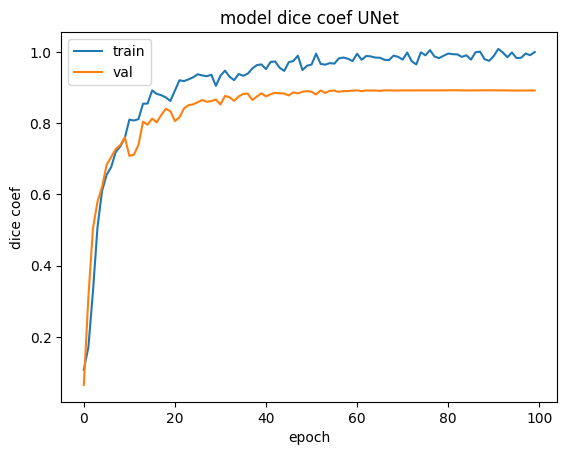

In [7]:
# summarize history for dice_coef

plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice coef UNet')
plt.ylabel('dice coef')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluate 

In [16]:
val_generator = DataGenerator2D('//PATH TO YOUR TEST DATA//', img_size=256,batch_size=128, shuffle=True)
model = unet.build_model()
model.load_weights('//PATH TO YOUR UNET MODEL WEIGHTS.h5//')
model.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = model.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 8s 2s/step - loss: 0.0726 - f1: 0.9216 - iou: 0.8888 - dice_coef: 0.9254


In [18]:
X, y = val_generator.__getitem__(0)
predict = model.predict(X)

4/4 [==============================] - 0s 115ms/step


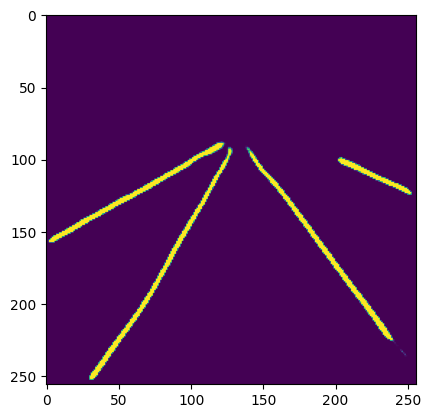

In [19]:
img = predict[2]
plt.imshow(img)

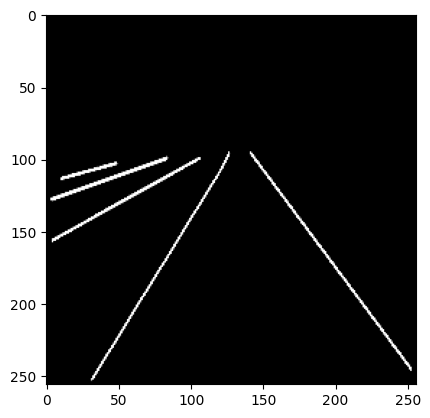

In [20]:
plt.imshow(y[2])

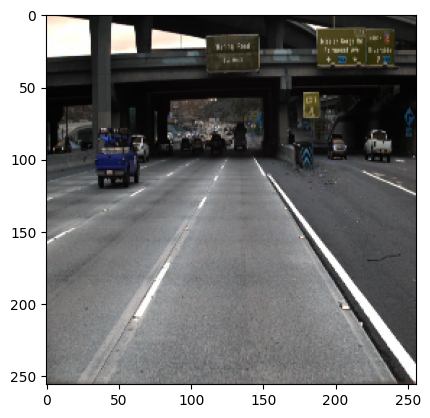

In [21]:
plt.imshow(X[2])